In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing all tables
accounts = pd.read_csv("accounts.csv")
products = pd.read_csv("products.csv")
sales_pipeline = pd.read_csv("sales_pipeline.csv")
sales_teams = pd.read_csv("sales_teams.csv")

In [3]:
#Making a copy of each file, so that we can revert back to original file just in case
account_df = accounts.copy()
products_df = products.copy()
sales_df = sales_pipeline.copy()
teams_df = sales_teams.copy()

### Data Preparation & Validation

In [4]:
#Checking missing values
account_df.isna().sum()

account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [5]:
#How many rows are there in accounts table?
len(account_df['account'])

85

Accounts table has 85 records in each column. Only 10 columns have subsidiary company details

In [6]:
products_df.isna().sum()

product        0
series         0
sales_price    0
dtype: int64

In [7]:
teams_df.isna().sum()

sales_agent        0
manager            0
regional_office    0
dtype: int64

No missing values from sales_team & product tables

In [8]:
sales_df.isna().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [9]:
print(f'Length of sales_pipeline columns are: ', len(sales_df['opportunity_id']))

Length of sales_pipeline columns are:  8800


In [10]:
sales_df[sales_df['account'].isna()]['deal_stage'].value_counts()

deal_stage
Engaging       1088
Prospecting     337
Name: count, dtype: int64

In [11]:
len(sales_df[(sales_df['deal_stage'] == 'Prospecting') & (sales_df['account'].notna())])

163

Key deductions:

* `Engage_date` has 500 values that means, 500 sales are at te prospecting stage.
* `Close_date` and `close_value` have the same size of missing values, meaning they has to be sales that are still ongoing & prospecting.
* There are 1425 rows without an Account (company). Within those, there are a majority of Engaging sales. We can safely assume these are sort of freelance sales since they are not assigned to a company. Furthermore there are 163 Prospecting sales with companies assigned to them.

## The following Insights were derived:

### Insights from Accounts Table:

01. How Many Subsidiary Companies For Each Parent Compan
02. Top 10 companies with most employees
03. Top 10 companies with highest Revenues
04. Companies with the highest HR-Revenue Efficiency
05. Location Distribution of Each Company
06. Breaking Down Subsidiary Companies By Location
07. Frequency Distribution of Companies Established in Each Year

- Discussion #1: Does a Higher Employee Count = Higher Revenues?
- Discussion #2: Do companies with higher number of employees and revenues have a higher HR-Revenue efficiency?

### Insights from Products Table:

01. Breaking Down Product Series Price Ranges

### Insights from Sales Pipeline Table:

01. Sales Agent Win Rate
02. How much Revenue did each Agent derived?
03. What products do each agent specialize in
04. Impact of Product Series to Win Rate
05. Average time it takes to close a product type
06. Average time it takes to close by sales person

- Discussion #1: Does having more wins as a total = more revenue derived?
- Discussion #2: Does a higher Win Rate = Higher Revenue?

### Insights from Sales Teams Table:

01. Manager Effectiveness: By Overall Team Success Rate & Win Rate

### Insights from Accounts Table

**01. How Many Subsidiary Companies For Each Parent Company?**

In [13]:
susidiaries = account_df[account_df['subsidiary_of'].notna()]
susidiaries.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
10,Codehow,software,1998,2714.90,2641,United States,Acme Corporation
13,Dalttechnology,software,2013,98.79,96,United States,Bubba Gump
14,dambase,marketing,1995,2173.98,2928,United States,Inity


In [14]:
len(susidiaries)

15

In [15]:
sub_values = susidiaries['subsidiary_of'].value_counts()
sub_values

subsidiary_of
Acme Corporation    4
Sonron              3
Bubba Gump          2
Golddex             2
Inity               2
Massive Dynamic     1
Warephase           1
Name: count, dtype: int64

In [17]:
sub_values = sub_values.reset_index()
sub_values.columns = ['Parent Company', 'Number of Subsidiaries']
sub_values

,Parent Company,Number of Subsidiaries
0,Acme Corporation,4
1,Sonron,3
2,Bubba Gump,2
3,Golddex,2
4,Inity,2
5,Massive Dynamic,1
6,Warephase,1


**02. Top 10 companies with most employees**

In [18]:
ranked_emp_heads = account_df.sort_values(by=['employees'], ascending= False)
ranked_emp_heads.reset_index(inplace=True)
ranked_emp_heads.index = ranked_emp_heads.index + 1
ranked_emp_heads.drop('index', axis = 1, inplace= True)
ranked_emp_heads.head(10) #Top 10 Companies with most employees

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
1,Kan-code,software,1982,11698.03,34288,United States,NaN
2,Xx-holding,finance,1993,7537.24,20293,United States,NaN
3,Initech,telecommunications,1994,6395.05,20275,United States,NaN
4,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
5,Scotfind,software,1996,6354.87,16780,United States,Bubba Gump
6,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
7,Zotware,software,1979,4478.47,13809,United States,NaN
8,Konex,technolgy,1980,7708.38,13756,United States,NaN
9,Dontechi,software,1982,4618.00,10083,United States,NaN
10,Y-corporation,employment,1983,2871.35,9561,United States,NaN


In [23]:
#Breaking down the sectors of top 10 companies with the most employees
emp_sectors = ranked_emp_heads.head(10)['sector'].value_counts().reset_index()
emp_sectors.columns = ['Sector', 'Number of appearances']

In [24]:
emp_sectors

,Sector,Number of appearances
0,software,4
1,technolgy,2
2,finance,1
3,telecommunications,1
4,retail,1
5,employment,1


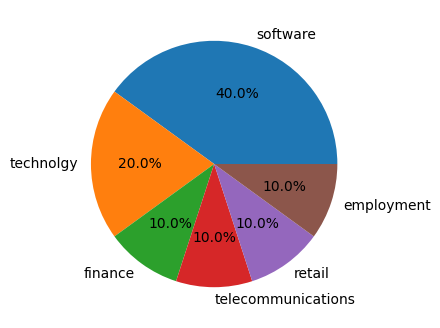

In [78]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(emp_sectors['Number of appearances'], labels = emp_sectors['Sector'], autopct='%1.1f%%')
plt.show()

**03. Top 10 companies with highest Revenues**

In [27]:
ranked_rev = account_df.sort_values(by=['revenue'], ascending = False)
ranked_rev.reset_index(inplace= True)
ranked_rev.index = ranked_rev.index + 1 #Re-naming the index
ranked_rev.drop('index', axis= 1, inplace = True)
ranked_rev.head(10) #Companies with Top 10 Revenue

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
1,Kan-code,software,1982,11698.03,34288,United States,NaN
2,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
3,Konex,technolgy,1980,7708.38,13756,United States,NaN
4,Xx-holding,finance,1993,7537.24,20293,United States,NaN
5,Initech,telecommunications,1994,6395.05,20275,United States,NaN
6,Scotfind,software,1996,6354.87,16780,United States,Bubba Gump
7,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron
8,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN
9,Fasehatice,retail,1990,4968.91,7523,United States,NaN
10,Dontechi,software,1982,4618.00,10083,United States,NaN


In [28]:
#Breaking down the sectors with the highest revenues (for top 10 companies)
rev_sectors = ranked_rev.head(10)['sector'].value_counts().reset_index()
rev_sectors.columns = ['Sector', 'Number of Appearances']
rev_sectors

,Sector,Number of Appearances
0,software,3
1,technolgy,2
2,telecommunications,2
3,retail,2
4,finance,1


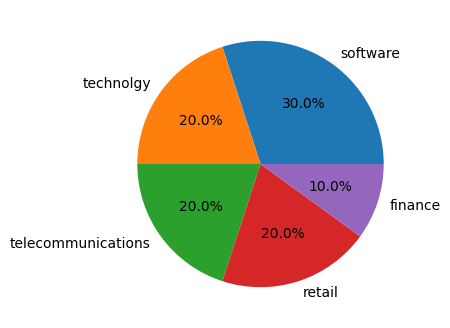

In [79]:
fig,ax = plt.subplots(figsize=(4,4))
ax.pie(rev_sectors['Number of Appearances'], labels = rev_sectors['Sector'], autopct='%1.1f%%')
plt.show()

**04. Companies with the highest HR-Revenue Efficiency**

This can be calculated using the `revenue per employee` metric. Which is a good indicator of how effectively a company is utilizing its human resources to generate revenue. A higher revenue per employee can indicate better productivity or efficiency

In [34]:
rev_per_emp = account_df.copy()
#We need to add a new column to see revenue devided per employee
rev_per_emp['rev_per_emp'] = (rev_per_emp['revenue'] / rev_per_emp['employees'] * 1000000).round(2)
#multiplied by million since revenue is in million per usd
rev_per_emp.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,rev_per_emp
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,389808.65
1,Betasoloin,medical,1999,251.41,495,United States,NaN,507898.99
2,Betatech,medical,1986,647.18,1185,Kenya,NaN,546143.46
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN,433141.59
4,Bioplex,medical,1991,326.82,1016,United States,NaN,321673.23


In [35]:
#Let's sort the dataframe
rev_per_emp.sort_values(by = ['rev_per_emp'], ascending = False, inplace = True)
rev_per_emp.reset_index(inplace = True)
rev_per_emp.drop('index',axis = 1, inplace = True)
rev_per_emp.head(10)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,rev_per_emp
0,Streethex,retail,1988,1376.80,1165,Belgium,NaN,1181802.58
1,Plusstrip,entertainment,2002,349.81,315,United States,NaN,1110507.94
2,Dalttechnology,software,2013,98.79,96,United States,Bubba Gump,1029062.50
3,Codehow,software,1998,2714.90,2641,United States,Acme Corporation,1027981.83
4,Conecom,technolgy,2005,1520.66,1806,United States,NaN,842004.43
5,Rundofase,technolgy,1983,1008.06,1238,United States,NaN,814264.94
6,Groovestreet,retail,2003,223.80,299,United States,NaN,748494.98
7,dambase,marketing,1995,2173.98,2928,United States,Inity,742479.51
8,Vehement Capital Partners,finance,1993,646.10,883,United States,Golddex,731710.08
9,Gekko & Co,retail,1990,2520.83,3502,United States,NaN,719825.81


In [36]:
#Breaking down the sectors of top 10 HR-Revenue efficiency companies
hr_effc_sectors = rev_per_emp.head(10)['sector'].value_counts().reset_index()
hr_effc_sectors.columns = ['Sector', 'Number of appearances']
hr_effc_sectors

,Sector,Number of appearances
0,retail,3
1,software,2
2,technolgy,2
3,entertainment,1
4,marketing,1
5,finance,1


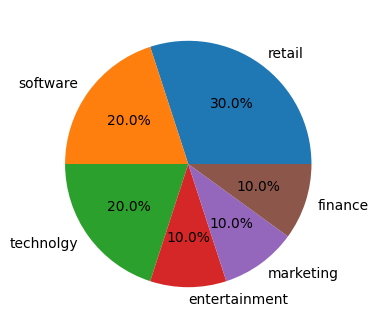

In [80]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(hr_effc_sectors['Number of appearances'], labels = hr_effc_sectors['Sector'], autopct='%1.1f%%')
plt.show()

**Discussion #1: Does a Higher Employee Count = Higher Revenues?**

In [47]:
#Let's extract the top 20% of comapnies from highest number of employees and higher revenues
top_20_perc = round(len(account_df['account']) * 0.2)
top_20_emp = list(ranked_emp_heads.head(top_20_perc)['account'])
top_20_rev = list(ranked_rev.head(top_20_perc)['account'])

In [49]:
#Let's see the top common companies from higher revenue and higher employees
commons = []
for i in top_20_emp:
    for j in top_20_rev:
        if i == j:
            commons.append(i)
commons

['Kan-code',
 'Xx-holding',
 'Initech',
 'Ganjaflex',
 'Scotfind',
 'Hottechi',
 'Zotware',
 'Konex',
 'Dontechi',
 'Mathtouch',
 'Treequote',
 'Xx-zobam',
 'Fasehatice']

In [66]:
print(f'Percentage of common companies: {round(((len(commons) / top_20_perc) * 100),2)}%')

Percentage of common companies: 76.47%


Therefore, we can assume that higher number of employees can lead to higher revenues

**Discussion #2: Do companies with higher number of employees and revenues have a higher HR-Revenue efficiency?**

In [68]:
#Let's confirm this by looking for common companies from "Companies with higher reveneues and employees" & "Companies with higher HR-Revenue Score"
top_20_hr_score = list(rev_per_emp.head(top_20_perc)['account'])

commons_2 = []
for i in commons:
    for j in top_20_hr_score:
        if i == j:
            commons_2.append(i)
commons_2

['Treequote', 'Fasehatice']

In [71]:
print(f'Percentage of common companies: {round(((len(commons_2) / len(commons)) * 100),2)}%')

Percentage of common companies: 15.38%


Only 2 comapnies were found with a ~15% propotion. This means not every company that has a higher revenue and a higher number of headcounts utilize their human resources to the maximum

**05. Location Distribution of Each Company**

In [72]:
location_dis = account_df['office_location'].value_counts().reset_index()
location_dis.columns=['Location', 'Companies']
location_dis

,Location,Companies
0,United States,71
1,Kenya,1
2,Philipines,1
3,Japan,1
4,Italy,1
5,Norway,1
6,Korea,1
7,Jordan,1
8,Brazil,1
9,Germany,1


**06.Breaking Down Subsidiary Companies By Location**

In [73]:
temp_1 = account_df.groupby(['subsidiary_of', 'office_location']).count().reset_index()
sub_loc_dis = temp_1[['subsidiary_of', 'office_location', 'account']]
sub_loc_dis.columns = ['Parent Company', 'Location', 'Number of Subsidiaries']
sub_loc_dis

,Parent Company,Location,Number of Subsidiaries
0,Acme Corporation,United States,4
1,Bubba Gump,United States,2
2,Golddex,United States,2
3,Inity,United States,2
4,Massive Dynamic,United States,1
5,Sonron,United States,3
6,Warephase,Brazil,1


**07. Frequncy Distribution of Companies Established in Each Year**

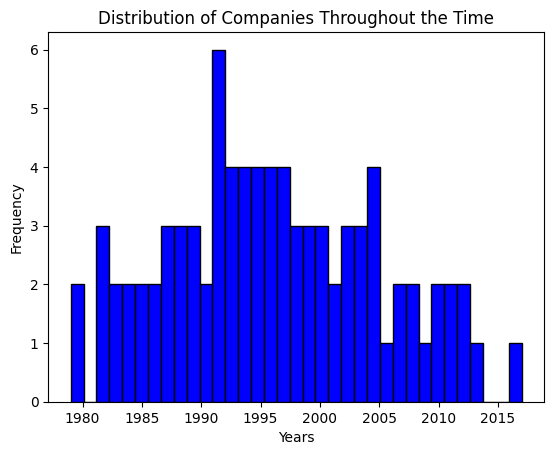

In [82]:
fig, ax = plt.subplots()

ax.hist(account_df['year_established'], bins=35, color='blue', edgecolor='black')
ax.set_title('Distribution of Companies Throughout the Time')
ax.set_xlabel('Years')
ax.set_ylabel('Frequency')
plt.show()

### Insights from Products Table

**01. Breaking Down Product Series Price Ranges**

In [102]:
#Let's get the maximum price of each series
prod_s_max = products_df.groupby('series').max().reset_index()
prod_s_max

,series,product,sales_price
0,GTK,GTK 500,26768
1,GTX,GTX Pro,5482
2,MG,MG Special,3393


In [103]:
#Let's get the minimum price of each series
prod_s_min= products_df.groupby('series').min().reset_index()
prod_s_min

,series,product,sales_price
0,GTK,GTK 500,26768
1,GTX,GTX Basic,550
2,MG,MG Advanced,55


In [104]:
#Let's combine both max and min price of each series
product_price_range = pd.DataFrame([prod_s_max['series'], prod_s_max['sales_price'], prod_s_min['sales_price']]).T
product_price_range.columns = ['Series', 'Highest End', 'Lowest End']
product_price_range

,Series,Highest End,Lowest End
0,GTK,26768,26768
1,GTX,5482,550
2,MG,3393,55


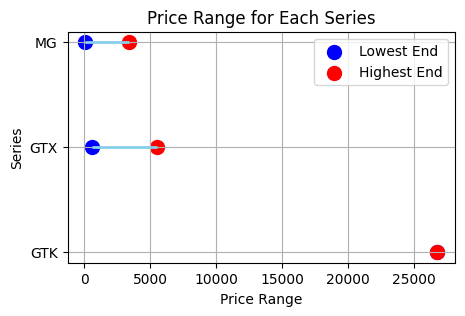

In [105]:
#ChatGPT Generated Code
plt.figure(figsize=(5, 3))

# Plot horizontal lines
plt.hlines(y=product_price_range['Series'], xmin=product_price_range['Lowest End'], xmax=product_price_range['Highest End'], color='skyblue', linewidth=2)

# Adding markers at the endpoints
plt.scatter(product_price_range['Lowest End'], product_price_range['Series'], color='blue', label='Lowest End', s=100)
plt.scatter(product_price_range['Highest End'], product_price_range['Series'], color='red', label='Highest End', s=100)

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Series')
plt.title('Price Range for Each Series')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Insights from Sales Pipeline Table

**01. Sales Agent Win Rate**

In [106]:
#Selecting already closed sales
closed_sales = sales_df[sales_df['close_date'].notna()]
closed_sales

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,10/20/2016,3/1/2017,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,10/25/2016,3/11/2017,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,10/25/2016,3/7/2017,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,10/25/2016,3/9/2017,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,10/25/2016,3/2/2017,517.0
...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,12/24/2017,12/26/2017,622.0
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,12/24/2017,12/30/2017,1093.0
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,12/26/2017,12/29/2017,4433.0
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,12/27/2017,12/30/2017,1052.0


In [107]:
#Grouping by Sales_Agent, Total Sales
#closed_sales.groupby('sales_agent').count().reset_index
total_sales = closed_sales['sales_agent'].value_counts().reset_index()
total_sales.columns= ['Sales_Agent', 'Total_Deals']
total_sales.head()

,Sales_Agent,Total_Deals
0,Darcel Schlecht,553
1,Vicki Laflamme,347
2,Anna Snelling,336
3,Kary Hendrixson,335
4,Donn Cantrell,275


In [108]:
temp_2 = closed_sales.groupby(['sales_agent', 'deal_stage']).count().reset_index()
temp_2.head()

,sales_agent,deal_stage,opportunity_id,product,account,engage_date,close_date,close_value
0,Anna Snelling,Lost,128,128,128,128,128,128
1,Anna Snelling,Won,208,208,208,208,208,208
2,Boris Faz,Lost,52,52,52,52,52,52
3,Boris Faz,Won,101,101,101,101,101,101
4,Cassey Cress,Lost,98,98,98,98,98,98


In [109]:
temp_3 = temp_2[['sales_agent','deal_stage', 'opportunity_id']]
temp_3.head() #Filtering only the needed information

,sales_agent,deal_stage,opportunity_id
0,Anna Snelling,Lost,128
1,Anna Snelling,Won,208
2,Boris Faz,Lost,52
3,Boris Faz,Won,101
4,Cassey Cress,Lost,98


In [110]:
temp_4 = temp_3.pivot_table(index='sales_agent', columns = 'deal_stage', aggfunc = 'first').reset_index()
temp_4.head() #Transform the shape of the table to more convenient format

sales_agent opportunity_id     
deal_stage                           Lost  Won
0            Anna Snelling            128  208
1                Boris Faz             52  101
2             Cassey Cress             98  163
3           Cecily Lampkin             53  107
4            Corliss Cosme             79  150

In [111]:
temp_4.columns = temp_4.columns.droplevel() #Can't run the same code twice if its already run

In [112]:
temp_4.columns = ['Sales_Agent', 'Lost', 'Wins']
temp_4.head() #Renaming the column names

,Sales_Agent,Lost,Wins
0,Anna Snelling,128,208
1,Boris Faz,52,101
2,Cassey Cress,98,163
3,Cecily Lampkin,53,107
4,Corliss Cosme,79,150


In [114]:
#Adding the total_details and making one single data frame with an overview
win_lose_details = pd.merge(left = total_sales, right = temp_4, how = 'left', left_on = 'Sales_Agent', right_on = 'Sales_Agent')
win_lose_details.head()

,Sales_Agent,Total_Deals,Lost,Wins
0,Darcel Schlecht,553,204,349
1,Vicki Laflamme,347,126,221
2,Anna Snelling,336,128,208
3,Kary Hendrixson,335,126,209
4,Donn Cantrell,275,117,158


In [115]:
#Let's add a w/l ratio
win_lose_details['W/L Ratio'] = (win_lose_details['Wins'] / win_lose_details['Lost']).round(2)
win_lose_details.head()

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio
0,Darcel Schlecht,553,204,349,1.71
1,Vicki Laflamme,347,126,221,1.75
2,Anna Snelling,336,128,208,1.62
3,Kary Hendrixson,335,126,209,1.66
4,Donn Cantrell,275,117,158,1.35


In [117]:
#Let's add the success percentage to each salesman
win_lose_details['Success_Perc'] = ((win_lose_details['Wins'] / win_lose_details['Total_Deals'])*100).round(2)
win_lose_details.head()

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc
0,Darcel Schlecht,553,204,349,1.71,63.11
1,Vicki Laflamme,347,126,221,1.75,63.69
2,Anna Snelling,336,128,208,1.62,61.90
3,Kary Hendrixson,335,126,209,1.66,62.39
4,Donn Cantrell,275,117,158,1.35,57.45


***Let's see the top 10 Sales Agents with the highest W/L Ratio***

In [118]:
#Ranking the top 10 performers
ranked_wl_ratio = win_lose_details.sort_values(by = 'W/L Ratio', ascending = False)
ranked_wl_ratio.reset_index(inplace = True)
ranked_wl_ratio.index = ranked_wl_ratio.index + 1
ranked_wl_ratio.drop('index', axis = 1, inplace = True)
ranked_wl_ratio.head(10)

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc
1,Hayden Neloms,152,45,107,2.38,70.39
2,Maureen Marcano,213,64,149,2.33,69.95
3,Wilburn Farren,79,24,55,2.29,69.62
4,Cecily Lampkin,160,53,107,2.02,66.88
5,Versie Hillebrand,264,88,176,2.00,66.67
6,Moses Frase,195,66,129,1.95,66.15
7,Boris Faz,153,52,101,1.94,66.01
8,James Ascencio,206,71,135,1.90,65.53
9,Corliss Cosme,229,79,150,1.90,65.50
10,Rosalina Dieter,110,38,72,1.89,65.45


***Let's see the top 10 Sales Agents with the highest W/L Ratio***

In [120]:
ranked_successes = win_lose_details.sort_values(by = 'Success_Perc', ascending = False)
ranked_successes.reset_index(inplace = True)
ranked_successes.index = ranked_successes.index + 1
ranked_successes.drop('index', axis = 1, inplace = True)
ranked_successes.head(10)

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc
1,Hayden Neloms,152,45,107,2.38,70.39
2,Maureen Marcano,213,64,149,2.33,69.95
3,Wilburn Farren,79,24,55,2.29,69.62
4,Cecily Lampkin,160,53,107,2.02,66.88
5,Versie Hillebrand,264,88,176,2.00,66.67
6,Moses Frase,195,66,129,1.95,66.15
7,Boris Faz,153,52,101,1.94,66.01
8,James Ascencio,206,71,135,1.90,65.53
9,Corliss Cosme,229,79,150,1.90,65.50
10,Rosalina Dieter,110,38,72,1.89,65.45


Looking at the above two data frames' output, we can safely assume that having a higher W/L ratio can mean having a higher success % as well

**02. How much Revenue did each Agent Drived?**

In [123]:
#We need only the sales that were won because lost sales brings no revenue
won_sales = sales_df[sales_df['deal_stage'] == "Won"]
won_sales.head(3) 

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,10/20/2016,3/1/2017,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,10/25/2016,3/11/2017,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,10/25/2016,3/7/2017,50.0


In [124]:
print(f'Number of Sales that were Won: {len(won_sales)}')

Number of Sales that were Won: 4238


In [126]:
agent_ttl_revenue = won_sales.groupby('sales_agent').sum('close_value').reset_index()
agent_ttl_revenue.columns = ['Sales_Agent', 'Total_Revenue']
agent_ttl_revenue.head()

,Sales_Agent,Total_Revenue
0,Anna Snelling,275056.0
1,Boris Faz,261631.0
2,Cassey Cress,450489.0
3,Cecily Lampkin,229800.0
4,Corliss Cosme,421036.0


In [127]:
#Top 10 revenue drivers (by total revenue brought)
ranked_ttl_rev = agent_ttl_revenue.sort_values(by = 'Total_Revenue', ascending = False)
ranked_ttl_rev.reset_index(inplace = True)
ranked_ttl_rev.index = ranked_ttl_rev.index + 1
ranked_ttl_rev.drop('index', axis= 1, inplace = True)
ranked_ttl_rev.head(10)

,Sales_Agent,Total_Revenue
1,Darcel Schlecht,1153214.0
2,Vicki Laflamme,478396.0
3,Kary Hendrixson,454298.0
4,Cassey Cress,450489.0
5,Donn Cantrell,445860.0
6,Reed Clapper,438336.0
7,Zane Levy,430068.0
8,Corliss Cosme,421036.0
9,James Ascencio,413533.0
10,Daniell Hammack,364229.0


**Discussion #1: Does having more wins as a total = more revenue derived?**

In [131]:
#Let's get the top 10 sales people with the highest number of wins as a total
most_wins = win_lose_details.sort_values(by = 'Total_Deals', ascending = False).head(10)
most_wins

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc
0,Darcel Schlecht,553,204,349,1.71,63.11
1,Vicki Laflamme,347,126,221,1.75,63.69
2,Anna Snelling,336,128,208,1.62,61.90
3,Kary Hendrixson,335,126,209,1.66,62.39
4,Donn Cantrell,275,117,158,1.35,57.45
5,Kami Bicknell,272,98,174,1.78,63.97
6,Jonathan Berthelot,264,93,171,1.84,64.77
7,Versie Hillebrand,264,88,176,2.00,66.67
8,Zane Levy,261,100,161,1.61,61.69
9,Cassey Cress,261,98,163,1.66,62.45


In [133]:
most_wins_list = list(most_wins['Sales_Agent'])
most_revenue_list = list(ranked_ttl_rev['Sales_Agent'].head(10))

commons_3 = []
for i in most_wins_list:
    for j in most_revenue_list:
        if i == j:
            commons_3.append(i)

commons_3

['Darcel Schlecht',
 'Vicki Laflamme',
 'Kary Hendrixson',
 'Donn Cantrell',
 'Zane Levy',
 'Cassey Cress']

In [134]:
print(f'Percentage of common sales people: {round(((len(commons_3) / len(most_revenue_list)) * 100),2)}%')

Percentage of common sales people: 60.0%


Since more than 50% of the top 10 sales people who brought more revenues are in the most wins (as a total) list. Therefore it's safe to conclude that there is a good relationship between higher number of wins and the amount of revenue brought

**Discussion #2: Does a higher Win Rate = Higher Revenue?**

We can use the same dataframe used to rank the top 10 sales people with the highest W/L ratio to sort by the 'revenue brought in' then we can see the positioning of the indexes of the top 10 people

In [140]:
temp_7 = pd.merge(left = ranked_wl_ratio, right = ranked_ttl_rev, how = 'left', left_on = 'Sales_Agent', right_on = 'Sales_Agent')
temp_7

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc,Total_Revenue
0,Hayden Neloms,152,45,107,2.38,70.39,272111.0
1,Maureen Marcano,213,64,149,2.33,69.95,350395.0
2,Wilburn Farren,79,24,55,2.29,69.62,157640.0
3,Cecily Lampkin,160,53,107,2.02,66.88,229800.0
4,Versie Hillebrand,264,88,176,2.00,66.67,187693.0
5,Moses Frase,195,66,129,1.95,66.15,207182.0
6,Boris Faz,153,52,101,1.94,66.01,261631.0
7,James Ascencio,206,71,135,1.90,65.53,413533.0
8,Corliss Cosme,229,79,150,1.90,65.50,421036.0
9,Rosalina Dieter,110,38,72,1.89,65.45,235403.0


In [141]:
#Let's order by the total_revenue to see index positioning
temp_7.sort_values(by= 'Total_Revenue', ascending = False)

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc,Total_Revenue
17,Darcel Schlecht,553,204,349,1.71,63.11,1153214.0
14,Vicki Laflamme,347,126,221,1.75,63.69,478396.0
20,Kary Hendrixson,335,126,209,1.66,62.39,454298.0
19,Cassey Cress,261,98,163,1.66,62.45,450489.0
27,Donn Cantrell,275,117,158,1.35,57.45,445860.0
10,Reed Clapper,237,82,155,1.89,65.40,438336.0
22,Zane Levy,261,100,161,1.61,61.69,430068.0
8,Corliss Cosme,229,79,150,1.90,65.50,421036.0
7,James Ascencio,206,71,135,1.90,65.53,413533.0
23,Daniell Hammack,187,73,114,1.56,60.96,364229.0


Only 2 sales people from the top 10 ranking of highest W/L ratio are within the first 10 when sorted by the `total_revenue` in the descending order. And a lot of top 10 rankers of highest W/L ratio can be found in the bottom after sorting. With this insight we can confirm that a higher W/L ratio doesn't contribute to higher revenues. It can be affected by factors like:

* Maturity of the sales person (Maybe there can be newcomers)
* The product series they specialize in can affect the revenue depending on the unitary gain of the product(s)

**03. What products do each agent specialize in**

In [135]:
temp_6 = won_sales.copy()
temp_6['deal_stage'].value_counts() #Making sure the data is copied correctly

deal_stage
Won    4238
Name: count, dtype: int64

In [136]:
#Dropping unnecessary data
temp_6.drop(['account', 'deal_stage', 'engage_date', 'close_date'], axis = 1, inplace= True)
temp_6.head()

,opportunity_id,sales_agent,product,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,588.0
4,PE84CX4O,Zane Levy,GTX Basic,517.0


In [142]:
#Replace GTXPro value to GTX Pro (Otherwse it casues problems with joining tables)
temp_6['product'] = temp_6['product'].replace('GTXPro', 'GTX Pro')
temp_6['product'].value_counts()

product
GTX Basic         915
MG Special        793
GTX Pro           729
MG Advanced       654
GTX Plus Basic    653
GTX Plus Pro      479
GTK 500            15
Name: count, dtype: int64

In [143]:
product_agent_sales = pd.merge(left = temp_6, right= products_df, how = 'left', left_on = 'product', right_on = 'product')
product_agent_sales.head()

,opportunity_id,sales_agent,product,close_value,series,sales_price
0,1C1I7A6R,Moses Frase,GTX Plus Basic,1054.0,GTX,1096
1,Z063OYW0,Darcel Schlecht,GTX Pro,4514.0,GTX,4821
2,EC4QE1BX,Darcel Schlecht,MG Special,50.0,MG,55
3,MV1LWRNH,Moses Frase,GTX Basic,588.0,GTX,550
4,PE84CX4O,Zane Levy,GTX Basic,517.0,GTX,550


In [144]:
#Getting how many products from each series did each agent sold
temp_8 = product_agent_sales.groupby(['sales_agent', 'series']).count().reset_index()
#Dropping unnecessary data
temp_8.drop(['product', 'close_value', 'sales_price'], axis = 1, inplace = True)
temp_8.head(4)

,sales_agent,series,opportunity_id
0,Anna Snelling,GTX,85
1,Anna Snelling,MG,123
2,Boris Faz,GTX,80
3,Boris Faz,MG,21


In [145]:
temp_9 = temp_8.pivot_table(index = 'sales_agent', columns = 'series', aggfunc = 'first')
temp_9.head()

opportunity_id              
series                    GTK    GTX     MG
sales_agent                                
Anna Snelling             NaN   85.0  123.0
Boris Faz                 NaN   80.0   21.0
Cassey Cress              NaN  117.0   46.0
Cecily Lampkin            NaN   49.0   58.0
Corliss Cosme             NaN  130.0   20.0

In [146]:
temp_9.columns = temp_9.columns.get_level_values(1) #ChatGPT Code to drop multi-level columns

In [147]:
temp_9.reset_index(inplace = True)

In [148]:
#replacing NaNs with 0s
temp_9.fillna(0, inplace = True)
temp_9.head() 

series,sales_agent,GTK,GTX,MG
0,Anna Snelling,0.0,85.0,123.0
1,Boris Faz,0.0,80.0,21.0
2,Cassey Cress,0.0,117.0,46.0
3,Cecily Lampkin,0.0,49.0,58.0
4,Corliss Cosme,0.0,130.0,20.0


In [149]:
specialise = temp_9.copy()
specialise

series,sales_agent,GTK,GTX,MG
0,Anna Snelling,0.0,85.0,123.0
1,Boris Faz,0.0,80.0,21.0
2,Cassey Cress,0.0,117.0,46.0
3,Cecily Lampkin,0.0,49.0,58.0
4,Corliss Cosme,0.0,130.0,20.0
5,Daniell Hammack,0.0,100.0,14.0
6,Darcel Schlecht,0.0,285.0,64.0
7,Donn Cantrell,0.0,123.0,35.0
8,Elease Gluck,7.0,27.0,46.0
9,Garret Kinder,0.0,49.0,26.0


**04. Impact of Product Series to Win Rate**

Does high W/L ratios are a by product of selling low-end products?

To do this, we can filter out the top 10 sales people with higher W/L ratios. Then we can see what products they have sold the most

In [154]:
top_wl_ratios = list(ranked_wl_ratio['Sales_Agent'].head(10))
specialise[specialise['sales_agent'].isin(top_wl_ratios)]

series,sales_agent,GTK,GTX,MG
1,Boris Faz,0.0,80.0,21.0
3,Cecily Lampkin,0.0,49.0,58.0
4,Corliss Cosme,0.0,130.0,20.0
11,Hayden Neloms,0.0,31.0,76.0
12,James Ascencio,0.0,112.0,23.0
19,Maureen Marcano,0.0,124.0,25.0
20,Moses Frase,0.0,77.0,52.0
23,Rosalina Dieter,5.0,21.0,46.0
25,Versie Hillebrand,0.0,32.0,144.0
28,Wilburn Farren,0.0,27.0,28.0


In [155]:
#Let's see the product price ranges
product_price_range

,Series,Highest End,Lowest End
0,GTK,26768,26768
1,GTX,5482,550
2,MG,3393,55


In [162]:
#Let's see the sales people who have sold highest end product which is "GTK"
gtk_sellers = specialise[specialise['GTK'] > 0]
gtk_sellers

series,sales_agent,GTK,GTX,MG
8,Elease Gluck,7.0,27.0,46.0
17,Markita Hansen,3.0,75.0,52.0
23,Rosalina Dieter,5.0,21.0,46.0


In [163]:
#Let's get GTK sellers W/L Ratio
gtk_sellers_list = list(gtk_sellers['sales_agent'])
win_lose_details[win_lose_details['Sales_Agent'].isin(gtk_sellers_list)]

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc
14,Markita Hansen,227,97,130,1.34,57.27
25,Elease Gluck,126,46,80,1.74,63.49
28,Rosalina Dieter,110,38,72,1.89,65.45


In [164]:
#Let's see GTK sellers revenue
temp_7[temp_7['Sales_Agent'].isin(gtk_sellers_list)]

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc,Total_Revenue
9,Rosalina Dieter,110,38,72,1.89,65.45,235403.0
15,Elease Gluck,126,46,80,1.74,63.49,289195.0
28,Markita Hansen,227,97,130,1.34,57.27,328792.0


It's hard to state that GTK sales disrectly contributed to higher revenues as all GTK sales people have sold more low end products with a few high end product. But what can be concluded is that GTK sales has to be harder to close as a win.

Moreover, we can see that most of the sales people within the top 10 W/L ratios have sold a lot of GTX products

**05. Average time it takes to close a product type**

In [168]:
#Let's take only the products that were won
won_sales_copy = won_sales.copy()
#Converting date type for calculations
won_sales_copy['engage_date'] = pd.to_datetime(won_sales_copy['engage_date'])
won_sales_copy['close_date'] = pd.to_datetime(won_sales_copy['close_date'])
won_sales_copy.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [172]:
won_sales_copy['days_to_close'] = (won_sales_copy['close_date'] - won_sales_copy['engage_date']).dt.days
won_sales_copy.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,days_to_close
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,132
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,137
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,133
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,135
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,128


In [177]:
days_to_close = won_sales_copy.groupby('product').mean('days_to_close').reset_index()
days_to_close['days_to_close'] = days_to_close['days_to_close'].round(2)
days_to_close.drop('close_value', axis= 1, inplace = True)
days_to_close

,product,days_to_close
0,GTK 500,64.07
1,GTX Basic,54.77
2,GTX Plus Basic,51.76
3,GTX Plus Pro,51.73
4,GTXPro,48.33
5,MG Advanced,51.78
6,MG Special,51.34


In [178]:
days_to_close.columns = ['Product', 'Average Days to Close']
days_to_close

,Product,Average Days to Close
0,GTK 500,64.07
1,GTX Basic,54.77
2,GTX Plus Basic,51.76
3,GTX Plus Pro,51.73
4,GTXPro,48.33
5,MG Advanced,51.78
6,MG Special,51.34


**06. Average time it takes to close by sales person**

In [187]:
agent_closing = won_sales_copy.groupby('sales_agent').mean('days_to_close')
agent_closing.reset_index(inplace= True)

In [191]:
agent_closing['close_value'] = agent_closing['close_value'].round(2)
agent_closing['days_to_close'] = agent_closing['days_to_close'].round(2)

agent_closing.columns = ['Sales Agent', 'AVG Close value', 'AVG Days to Close']

KeyError: 'close_value'

In [196]:
agent_closing= agent_closing.sort_values(by = 'AVG Days to Close', ascending = True)
agent_closing.reset_index(inplace = True)
agent_closing.index = agent_closing.index + 1
agent_closing.drop('index', axis = 1, inplace = True)

In [197]:
agent_closing

,Sales Agent,AVG Close value,AVG Days to Close
1,Cecily Lampkin,2147.66,42.30
2,Rosie Papadopoulos,2950.88,43.49
3,Elease Gluck,3614.94,43.52
4,Daniell Hammack,3194.99,46.59
5,Zane Levy,2671.23,46.93
6,Boris Faz,2590.41,48.10
7,Marty Freudenburg,2386.84,48.54
8,Cassey Cress,2763.74,48.79
9,Reed Clapper,2827.97,48.95
10,Darcel Schlecht,3304.34,49.43


### Insights from Sales Teams Table

First of all we need to combine sales_teams data with managers

In [206]:
teams_df = teams_df.rename(columns={'sales_agent': 'Sales_Agent'})
teams_df.head(3)

,Sales_Agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central


In [201]:
agent_closing_copy = agent_closing.copy()
agent_closing_copy = agent_closing_copy.rename(columns={'Sales Agent': 'Sales_Agent'})
agent_closing_copy.head(3)

,Sales_Agent,AVG Close value,AVG Days to Close
1,Cecily Lampkin,2147.66,42.30
2,Rosie Papadopoulos,2950.88,43.49
3,Elease Gluck,3614.94,43.52


In [204]:
temp_10 = pd.merge(left = win_lose_details, right = agent_closing_copy, how = 'left', left_on = 'Sales_Agent', right_on = 'Sales_Agent')
temp_10.head()

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc,AVG Close value,AVG Days to Close
0,Darcel Schlecht,553,204,349,1.71,63.11,3304.34,49.43
1,Vicki Laflamme,347,126,221,1.75,63.69,2164.69,53.56
2,Anna Snelling,336,128,208,1.62,61.90,1322.38,51.99
3,Kary Hendrixson,335,126,209,1.66,62.39,2173.67,52.97
4,Donn Cantrell,275,117,158,1.35,57.45,2821.90,53.33


In [207]:
team_overview = pd.merge(left = temp_10, right = teams_df, how = 'left', left_on = 'Sales_Agent', right_on = 'Sales_Agent')
team_overview

,Sales_Agent,Total_Deals,Lost,Wins,W/L Ratio,Success_Perc,AVG Close value,AVG Days to Close,manager,regional_office
0,Darcel Schlecht,553,204,349,1.71,63.11,3304.34,49.43,Melvin Marxen,Central
1,Vicki Laflamme,347,126,221,1.75,63.69,2164.69,53.56,Celia Rouche,West
2,Anna Snelling,336,128,208,1.62,61.90,1322.38,51.99,Dustin Brinkmann,Central
3,Kary Hendrixson,335,126,209,1.66,62.39,2173.67,52.97,Summer Sewald,West
4,Donn Cantrell,275,117,158,1.35,57.45,2821.90,53.33,Rocco Neubert,East
5,Kami Bicknell,272,98,174,1.78,63.97,1818.71,50.04,Summer Sewald,West
6,Jonathan Berthelot,264,93,171,1.84,64.77,1666.00,51.33,Melvin Marxen,Central
7,Versie Hillebrand,264,88,176,2.00,66.67,1066.44,51.82,Dustin Brinkmann,Central
8,Zane Levy,261,100,161,1.61,61.69,2671.23,46.93,Summer Sewald,West
9,Cassey Cress,261,98,163,1.66,62.45,2763.74,48.79,Rocco Neubert,East


Assessing Each Manager performance in the following categories:

01. Overall team success rate
02. Team win rate

**Overall Team Success Rate**

In [209]:
mgr_overview = team_overview.groupby('manager').sum('Total_Deals').reset_index()
mgr_overview.drop(['W/L Ratio', 'Success_Perc', 'AVG Close value', 'AVG Days to Close'], axis = 1, inplace = True)
mgr_overview

,manager,Total_Deals,Lost,Wins
0,Cara Losch,745,265,480
1,Celia Rouche,962,352,610
2,Dustin Brinkmann,1186,439,747
3,Melvin Marxen,1418,536,882
4,Rocco Neubert,1113,422,691
5,Summer Sewald,1287,459,828


In [210]:
mgr_overview['W/L_Ratio'] = (mgr_overview['Wins'] / mgr_overview['Lost']).round(2)
mgr_overview['Success_Perc'] = ((mgr_overview['Wins'] / mgr_overview['Total_Deals']) * 100).round(2)
mgr_overview

,manager,Total_Deals,Lost,Wins,W/L_Ratio,Success_Perc
0,Cara Losch,745,265,480,1.81,64.43
1,Celia Rouche,962,352,610,1.73,63.41
2,Dustin Brinkmann,1186,439,747,1.70,62.98
3,Melvin Marxen,1418,536,882,1.65,62.20
4,Rocco Neubert,1113,422,691,1.64,62.08
5,Summer Sewald,1287,459,828,1.80,64.34


In [211]:
mgr_overview = mgr_overview.sort_values(by = 'Success_Perc', ascending = False)
mgr_overview

,manager,Total_Deals,Lost,Wins,W/L_Ratio,Success_Perc
0,Cara Losch,745,265,480,1.81,64.43
5,Summer Sewald,1287,459,828,1.80,64.34
1,Celia Rouche,962,352,610,1.73,63.41
2,Dustin Brinkmann,1186,439,747,1.70,62.98
3,Melvin Marxen,1418,536,882,1.65,62.20
4,Rocco Neubert,1113,422,691,1.64,62.08


As per the above view, `Cara Losch` have the best manager effectiveness